Using the imdb movie review dataset from Keras, we can build a binary classifier that will classify a review as positive or negative based on the words used in the review.

After importing the data, train_data[0] will show the word indeces of the first review within the training set.

In [2]:
import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

Train_labels[0] will show the label assigned to that first review.

In [3]:
train_labels[0]

1

Since the label is 1, we know that the first review is a positive review. (i.e. label == 0 is a negative review, label == 1 is a positive review)

We limit ourselves to the top 1,000 most frequent words (For truly effective results, we should use 10,000, but due to RAM limitations, I will use 1,000). This allows our binary classifier to classify reviews faster and more accurately. This is because infrequent words will hold little weight in determining whether a review is positive or negative.

In [4]:
max([max(sequence) for sequence in train_data])

999

To be able to view the review in English, rather than word mapping, we can decode the review.

In [5]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the review; note that our indices were offset by 3
# because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown"
decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decode_review)

? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all


Unfortunately, neural networks are unable to classify based solely on integers. A solution would be one-hot-encoding our lists to convert to binary vectors (i.e. vectors containing 0s and 1s). For example, converting the sequence [3, 5] into a vector with 1,000 dimensions, all being 0s except for indices 3 and 5. We then implement the first layer of the neural network as a Dense layer, capable of handling floating point vectors.

An example of this solution is as follows:

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=1000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # Set specific indices of results[i] to 1
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train[0]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

It's time to build the neural network. Given the format of our converted inputs, a network of fully connected Dense layers with rectified linear unit activation would work best.

We use 16 hidden units so that the weight matrix w will have the shape (input_dimension, 16). In other words, when we take the dot product of w and the input data, the result will be a 16-dimensional space. We choose 16 hidden units for 2 reasons. First, it prevents the network from learning the training set too well. Second, it lowers cost of the network computation. The one drawback, however, is the network will have an inability to learn more complex representations.

Using 16 hidden units, and three layers (two intermediates, one for scalar prediction output), we can implement the network as follows:

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

We specify the activation of the third layer as a sigmoid function. This builds the third layer so that it will ouput a probability, between 0 and 1, that corresponds to how likely the review is a positive review.

The final element of building our network is deciding on a loss function. Given that our model is binary classification, and the output is a probability, binary_crossentropy would be the best loss function. This is because crossentropy is a quantity that measures the distance between ground-truth distribution and our predictions. That is, the distance between the correct output and our predicted output. This measure works great for probabilities.

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Now, we begin training our network. Part of training includes validating our approach to the network itself. To do so, we can create a set of 10,000 samples from the training data, to be used as our validation set.

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We can now begin our training. We will do so for 20 iterations over the training data. Each of these iterations is known as an epoch. Within each iteration, we will divide the data into sets of 512 samples. This will allow us to closely monitor our loss and accuracy on the validation set.

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.5889 - acc: 0.7005 - val_loss: 0.4870 - val_acc: 0.7888
Epoch 2/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.4316 - acc: 0.8209 - val_loss: 0.4069 - val_acc: 0.8258
Epoch 3/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.3694 - acc: 0.8501 - val_loss: 0.3663 - val_acc: 0.8452
Epoch 4/20
15000/15000 [==============================] - 1s 49us/step - loss: 0.3370 - acc: 0.8621 - val_loss: 0.3483 - val_acc: 0.8536
Epoch 5/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.3237 - acc: 0.8666 - val_loss: 0.3462 - val_acc: 0.8527
Epoch 6/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.3074 - acc: 0.8741 - val_loss: 0.3416 - val_acc: 0.8571
Epoch 7/20
15000/15000 [==============================] - 1s 54us/step - loss: 0

After calling model.fit(), a History object is returned (hence setting the return value to a variable "history"). This history object holds a dictionary of data describing every event that took place during training.

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

The history contains four entries. These entries are representations of the loss and accuracy during both training and validation. To create a visual representation, we can plot these metrics.

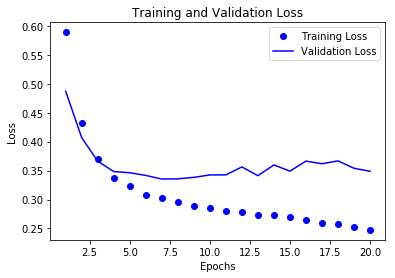

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
# "b" is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

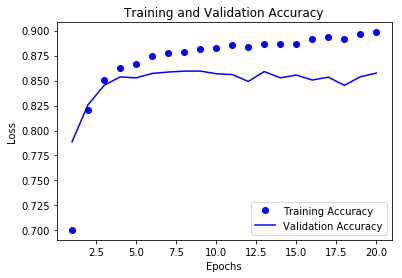

In [15]:
plt.clf()    # Clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The blue dots represent training lost and accuracy, whereas the blue lines represent validation loss and accuracy. Normally we would see that the model learned the training data too well, and begins over-optimizing after the third epoch, preventing it from generalizing to the test set. However, due to lowering the network specifications due to RAM limitations, the graph data is a bit skewed.

To prevent this, we can simply stop training at the point of over-optimization. We can now re-train the algorithm using a smaller number of epochs.

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (1000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.5456 - acc: 0.7512
Epoch 2/4
25000/25000 [==============================] - 1s 43us/step - loss: 0.3812 - acc: 0.8462
Epoch 3/4
25000/25000 [==============================] - 1s 44us/step - loss: 0.3347 - acc: 0.8620
Epoch 4/4
25000/25000 [==============================] - 3s 114us/step


In [17]:
results

[0.3302596697616577, 0.86068]

As you can see, this improved approach achieves nearly the same accuracy in only 4 epochs.

Now that the network is trained using the training data, we can apply it to the test data. Using model.predict(), we can generate the probability predictions for each review using our trained model.

In [18]:
model.predict(x_test)

array([[0.32415926],
       [0.99721444],
       [0.3669784 ],
       ...,
       [0.10010603],
       [0.10524654],
       [0.3598267 ]], dtype=float32)

But what if there are more than two outputs? We can't use a binary classifier. Take, for example, the Reuters newswires. We want to classify them into 46 different mutually-exclusive topics. We will use the same concept of classifying based on the words used in the review.

First, we download and process the dataset.

In [19]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 1000)

Once again, we restrict the number of words to the 10,000 most frequently used words (Again, RAM limitations keeps this to 1,000 in my test).

In [20]:
len(train_data)

8982

In [21]:
len(test_data)

2246

We can see that the training set contains 8982 cases, and the test set contains 2246 cases. These cases are constructed just like in the IMBD set. That is, each word is encoded by its index in a dictionary.

In [22]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

Like with the IMBD dataset, decoding the newswires work can be done with the following code:

In [23]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unkown"
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3


The label for each case of training data is an integer from 0 to 45, each representing one of the 46 different topics.

In [24]:
train_labels[10]

3

We can vectorize the data the same way as before.

In [25]:
import numpy as np

def vectorize_sequences(sequences, dimension = 1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

We can vectorize the labels using one-hot-encoding as well.

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

Now we build the network. However this time, a 16-dimensional space is too small to learn 46 seperate classes. For this reason, we need a larger size of hidden units. Let's say, 64. And, of course, we use 46 for the final layer, as there are 46 different classes.

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (1000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

The final layer will output a 46 dimensional vector. Each entry in this vector will encode each output class. The softmax activation allows the final layer to produce that 46 dimensional vector to where the entries in the vector are a probability that the sample belongs to that class. In other words, if output[2] == 0.11, then the network predicts that the sample has an 11% chance it belongs to class 2. All output entries sum to 1.

Now we decide on our loss function. Given the parameters of our dataset, categorical_crossentropy will fit best. This is because categorical measures the distance between two probability distributions. In other words, it measures the distance between the probability distribution calculated by this network, and the true probability distribution. This trains the network to output as close as possible to the true distribution.

In [28]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

As with the last model, we have to create a validation set. Due to this dataset being significantly smaller than the first, we can use 1,000 samples, rather than 10,000.

In [29]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

And now we begin training. Let's start with 20 epochs again.

In [30]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 158us/step - loss: 2.6491 - acc: 0.4658 - val_loss: 1.8634 - val_acc: 0.5590
Epoch 2/20
7982/7982 [==============================] - 1s 84us/step - loss: 1.6717 - acc: 0.6110 - val_loss: 1.5169 - val_acc: 0.6430
Epoch 3/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.3966 - acc: 0.6883 - val_loss: 1.3472 - val_acc: 0.6980
Epoch 4/20
7982/7982 [==============================] - 1s 83us/step - loss: 1.2285 - acc: 0.7288 - val_loss: 1.2312 - val_acc: 0.7230
Epoch 5/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.0971 - acc: 0.7596 - val_loss: 1.1509 - val_acc: 0.7460
Epoch 6/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.9951 - acc: 0.7790 - val_loss: 1.0972 - val_acc: 0.7510
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.9115 - acc: 0.7952 - val_loss: 1.0539 - val_acc: 0.7670
Epoch 

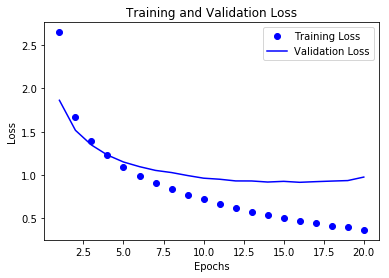

In [31]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

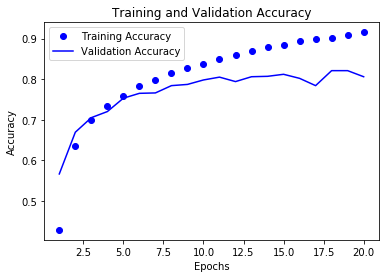

In [59]:
plt.clf()    # Clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Due to RAM limitations forcing the use of the 1,000 most frequently used words, rather than 10,000, my results are a bit skewed. The correct results would show that over-training starts after 9 epochs.

Now we redefine our network using 9 epochs, and run it on the test data.

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (1000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 189us/step - loss: 2.6981 - acc: 0.4577 - val_loss: 1.8883 - val_acc: 0.5740
Epoch 2/9
7982/7982 [==============================] - 1s 88us/step - loss: 1.6505 - acc: 0.6389 - val_loss: 1.4760 - val_acc: 0.6630
Epoch 3/9
7982/7982 [==============================] - 1s 88us/step - loss: 1.3480 - acc: 0.6981 - val_loss: 1.3056 - val_acc: 0.7050
Epoch 4/9
7982/7982 [==============================] - 1s 87us/step - loss: 1.1793 - acc: 0.7329 - val_loss: 1.2098 - val_acc: 0.7180
Epoch 5/9
7982/7982 [==============================] - 1s 85us/step - loss: 1.0595 - acc: 0.7618 - val_loss: 1.1325 - val_acc: 0.7470
Epoch 6/9
7982/7982 [==============================] - 1s 86us/step - loss: 0.9694 - acc: 0.7823 - val_loss: 1.0658 - val_acc: 0.7640
Epoch 7/9
7982/7982 [==============================] - 1s 83us/step - loss: 0.8842 - acc: 0.7998 - val_loss: 1.0420 - val_acc: 0.7710
Epoch 8/9
798

In [33]:
results

[1.0629782956939453, 0.7466607302400754]

The resulting accuracy is ~75%. This would be closer to 80% given we use 10,000 frequent words, rather than 1,000, so we'll pretend it's closer to 80%.

Now let's make predictions on the test set.

In [34]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))

(46,)
1.0000001


We can see that the resulting output is a vector of size 46, and the elements of the vector sum to 1 (plus or minus a negligible amount due to rounding during calculation)

Finding the highest probability within this vector specifies which class the network predicts the data case belongs to.

In [35]:
np.argmax(predictions[0])

3